In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/restaurant_menu_optimization_data.csv')

In [ ]:
df.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [ ]:
df.tail()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High
999,R001,Beverages,Soda,['confidential'],4.26,Medium


In [ ]:
df.shape

(1000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

<Axes: ylabel='Price'>

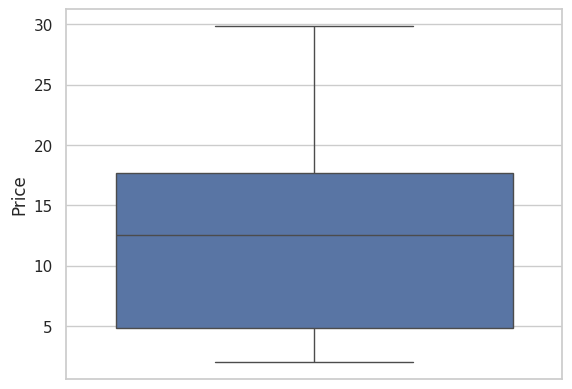

In [ ]:
sns.boxplot(df['Price'])

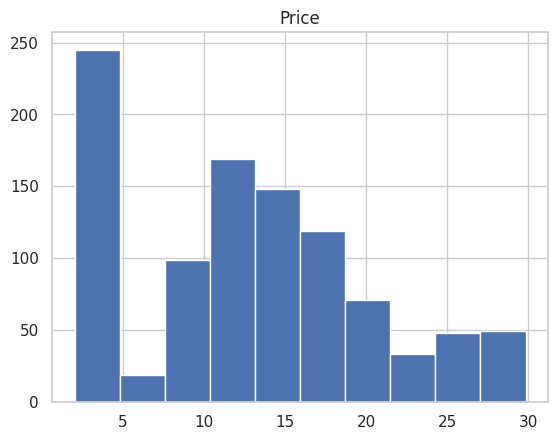

In [ ]:
df.hist('Price')
plt.show()

<ipython-input-209-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

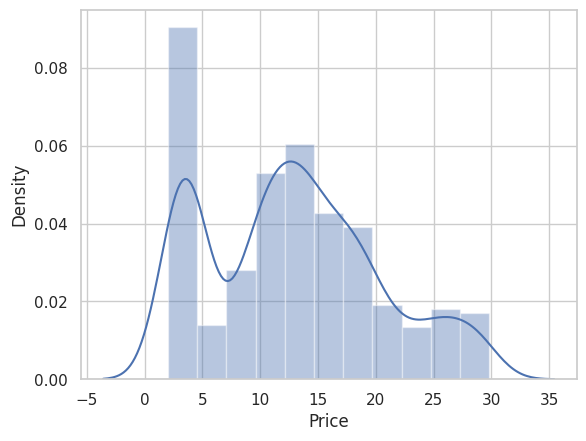

In [ ]:
sns.distplot(df['Price'])

In [ ]:
print("Nilai hilang per kolom:")
print(data.isnull().sum())

Nilai hilang per kolom:
RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


In [ ]:
# 3. Buat objek LabelEncoder dan kodekan kolom kategorikal
label_encoder = LabelEncoder()
categorical_cols = ['RestaurantID', 'MenuCategory', 'MenuItem', 'Ingredients', 'Profitability']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Kodekan kolom kategorik
data['RestaurantID'] = label_encoder.fit_transform(data['RestaurantID'])
data['MenuCategory'] = label_encoder.fit_transform(data['MenuCategory'])
data['MenuItem'] = label_encoder.fit_transform(data['MenuItem'])
data['Ingredients'] = label_encoder.fit_transform(data['Ingredients'])
data['Profitability'] = label_encoder.fit_transform(data['Profitability'])

In [ ]:
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# 4. Buat objek StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
print("\nTipe data setelah prapemrosesan:")
print(data_scaled.dtypes)


Tipe data setelah prapemrosesan:
RestaurantID     float64
MenuCategory     float64
MenuItem         float64
Ingredients      float64
Price            float64
Profitability    float64
dtype: object


In [ ]:
print("\nData setelah prapemrosesan:")
print(data_scaled.head())


Data setelah prapemrosesan:
   RestaurantID  MenuCategory  MenuItem  Ingredients     Price  Profitability
0      1.258343     -0.413089  0.725245     1.303674 -1.385057      -0.116919
1     -1.177946     -1.322975  0.941028     0.400853 -0.229045       0.955736
2      1.258343      0.496798  0.293680    -0.501969  0.788029      -1.189575
3      1.258343      1.406685 -1.216798    -1.404790  2.256986      -1.189575
4      0.040199      1.406685 -0.353668    -1.404790  0.662581       0.955736


In [ ]:
# 4. Buat objek StandardScaler
scaler = StandardScaler()

In [ ]:
###
print("\nTipe data setelah preprocessing:")
print(data.dtypes)


Tipe data setelah preprocessing:
RestaurantID       int64
MenuCategory       int64
MenuItem           int64
Ingredients        int64
Price            float64
Profitability      int64
dtype: object


In [ ]:
##### Menampilkan data setelah prapemrosesan
print("\nData setelah prapemrosesan:")
print(data.head())


Data setelah prapemrosesan:
   RestaurantID  MenuCategory  MenuItem  Ingredients  Price  Profitability
0             2             1        11            3   2.55              1
1             0             0        12            2  11.12              2
2             2             2         9            1  18.66              0
3             2             3         2            0  29.55              0
4             1             3         6            0  17.73              2


In [ ]:
# Pisahkan data menjadi fitur dan target
X = data.drop('Profitability', axis=1)
y = data['Profitability']

In [ ]:
# Pisahkan menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Inisialisasi model
model = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [ ]:
# Fungsi untuk evaluasi model
def evaluasi_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    akurasi = accuracy_score(y_test, y_pred)
    presisi = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return akurasi, presisi, recall, f1

In [ ]:
# 3. Latih dan evaluasi model
hasil = {}
for nama_model, mdl in model.items():
    akurasi, presisi, recall, f1 = evaluasi_model(mdl, X_train, X_test, y_train, y_test)
    hasil[nama_model] = {'Akurasi': akurasi, 'Presisi': presisi, 'Recall': recall, 'F1 Score': f1}
    print(f"Hasil untuk {nama_model}:")
    print(f"Akurasi: {akurasi}")
    print(f"Presisi: {presisi}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil untuk SVM:
Akurasi: 0.79
Presisi: 0.6927952836988982
Recall: 0.79
F1 Score: 0.7377369186046511

Hasil untuk KNN:
Akurasi: 0.875
Presisi: 0.8783213993282422
Recall: 0.875
F1 Score: 0.8687024253731344

Hasil untuk Random Forest:
Akurasi: 0.9
Presisi: 0.8960036308600741
Recall: 0.9
F1 Score: 0.8933832424316707



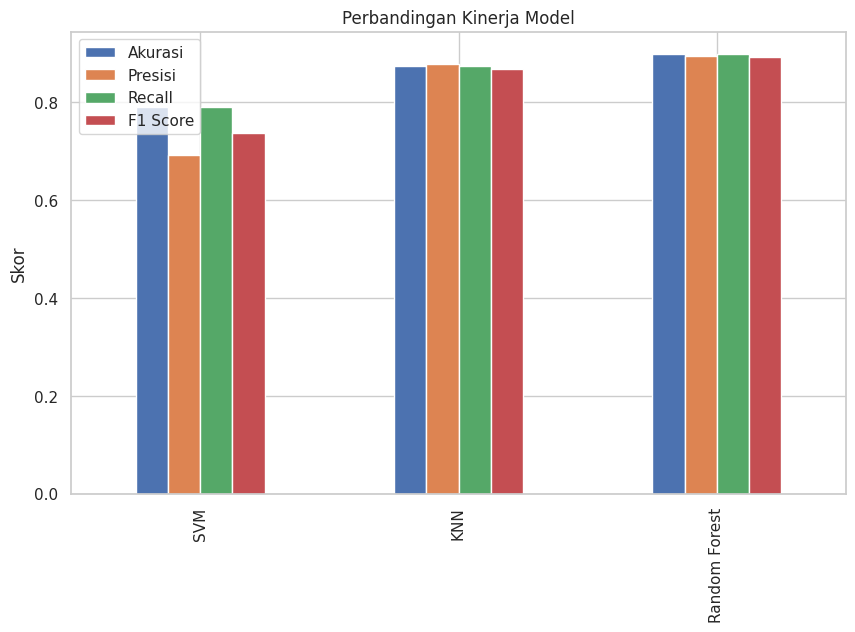

In [ ]:
# 4. Visualisasikan hasil
df_hasil = pd.DataFrame(hasil).T
df_hasil.plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Kinerja Model')
plt.ylabel('Skor')
plt.show()

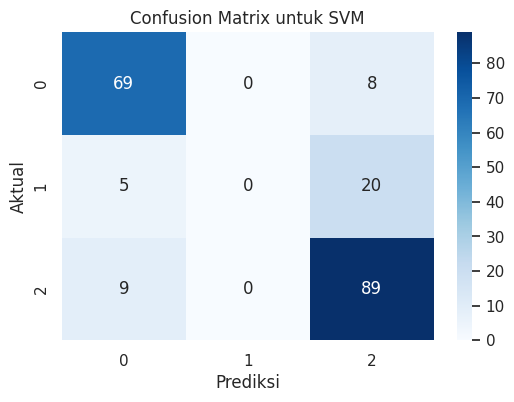

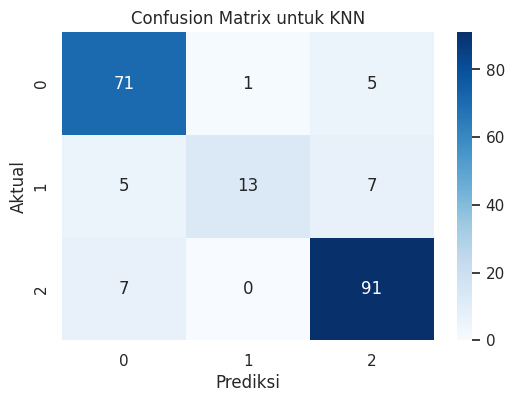

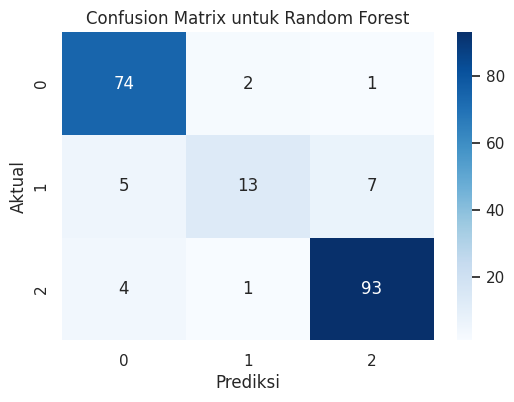

In [ ]:
# 5. Confusion Matrix untuk setiap model
for nama_model, mdl in model.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix untuk {nama_model}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()


In [ ]:
# 6. Validasi silang
for nama_model, mdl in model.items():
    skor = cross_val_score(mdl, X, y, cv=5, scoring='accuracy')
    print(f"Skor validasi silang untuk {nama_model}: {skor}")
    print(f"Rata-rata skor validasi silang untuk {nama_model}: {skor.mean()}\n")

Skor validasi silang untuk SVM: [0.78  0.79  0.835 0.785 0.775]
Rata-rata skor validasi silang untuk SVM: 0.793

Skor validasi silang untuk KNN: [0.885 0.84  0.915 0.9   0.855]
Rata-rata skor validasi silang untuk KNN: 0.8789999999999999

Skor validasi silang untuk Random Forest: [0.895 0.885 0.915 0.915 0.9  ]
Rata-rata skor validasi silang untuk Random Forest: 0.9020000000000001



In [ ]:
# Inisialisasi model regresi (contoh: Linear Regression)
model_regresi = LinearRegression()

# Latih model dengan data pelatihan
model_regresi.fit(X_train, y_train)

# Prediksi dengan data pengujian
y_pred = model_regresi.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Cetak hasil metrik evaluasi
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.6010172129029198
Mean Squared Error (MSE): 0.4641259456084886
Root Mean Squared Error (RMSE): 0.6812678956243928
R-squared (R²): 0.4628016486489903
